Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.

Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [25]:
url = "/content/uber.csv"
data = pd.read_csv(url)
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [26]:
print("Null values in each column", data.isnull().sum())

Null values in each column Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [27]:
data = data.dropna()

In [28]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

<ipython-input-28-a19d3dc2c768>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])


In [29]:
data['hour'] = data['pickup_datetime'].dt.hour
data['day'] = data['pickup_datetime'].dt.time
data['month'] = data['pickup_datetime'].dt.month
data['year'] = data['pickup_datetime'].dt.year

<ipython-input-29-48710e938682>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data['pickup_datetime'].dt.hour
<ipython-input-29-48710e938682>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = data['pickup_datetime'].dt.time
<ipython-input-29-48710e938682>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [30]:
data = data.drop(['pickup_datetime', 'key'], axis=1)

print(data.head())

   Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  ...  hour       day  month  year
0    24238194          7.5        -73.999817        40.738354  ...    19  19:52:06      5  2015
1    27835199          7.7        -73.994355        40.728225  ...    20  20:04:56      7  2009
2    44984355         12.9        -74.005043        40.740770  ...    21  21:45:00      8  2009
3    25894730          5.3        -73.976124        40.790844  ...     8  08:22:21      6  2009
4    17610152         16.0        -73.925023        40.744085  ...    17  17:47:00      8  2014

[5 rows x 11 columns]


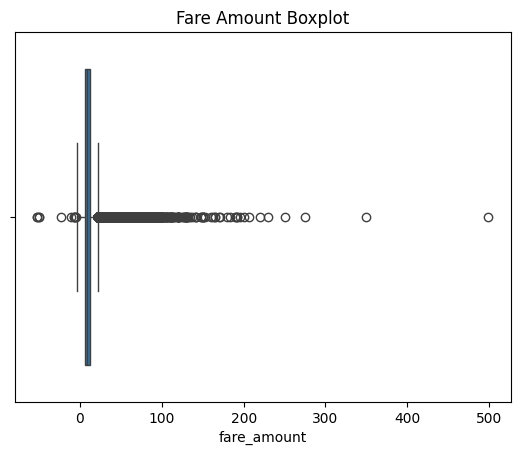

In [31]:
sns.boxplot(x=data['fare_amount'])
plt.title('Fare Amount Boxplot')
plt.show()

In [32]:
data = data[(data['fare_amount'] >= 2) & (data['fare_amount'] <= 100)]

In [33]:
data = data[(data['passenger_count'] >= 1) & (data['passenger_count'] <= 6)]

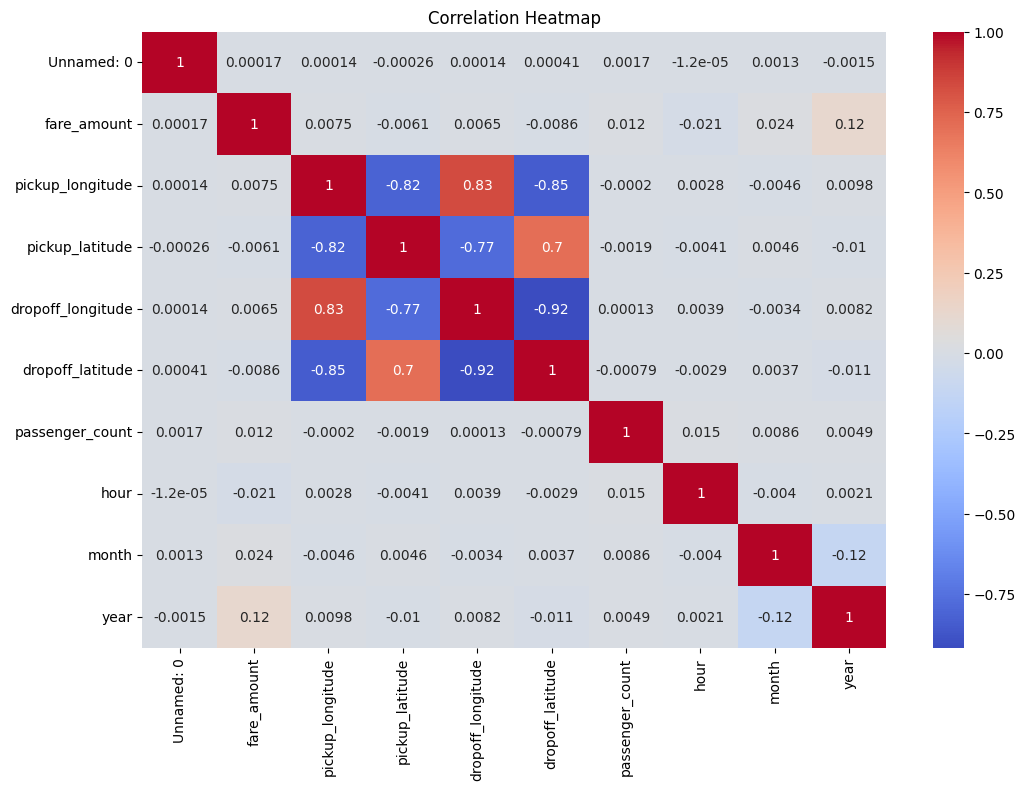

In [23]:
numeric_data = data.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X = data.drop('fare_amount', axis=1).select_dtypes(include=[np.number])
y = data['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [39]:
def evaluate_model(y_true, y_pred, model_name):
  print(f"\n{model_name} Results:")
  print("R2 Score:", r2_score(y_true, y_pred))
  print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

In [40]:
evaluate_model(y_test, y_pred_linear, 'Linear Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest Regression')


Linear Regression Results:
R2 Score: 0.017351413397898918
RMSE: 9.52366229082664

Random Forest Regression Results:
R2 Score: 0.8374102677986989
RMSE: 3.8739269574818733
